In [35]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

#Getting the Data

In [36]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, y, columns=data.feature_names)
df["target"] = y

In [37]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 1
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 non-

In [39]:
df["target"].value_counts()

,count
target,
1,357
0,212


# Data Pre Processing

<ipython-input-40-70c5d8e49ce8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'target', data = df, palette = 'crest')


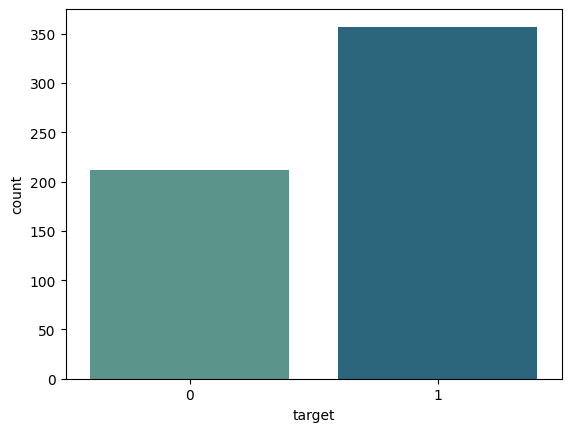

In [40]:
sns.countplot(x = 'target', data = df, palette = 'crest')
plt.show()

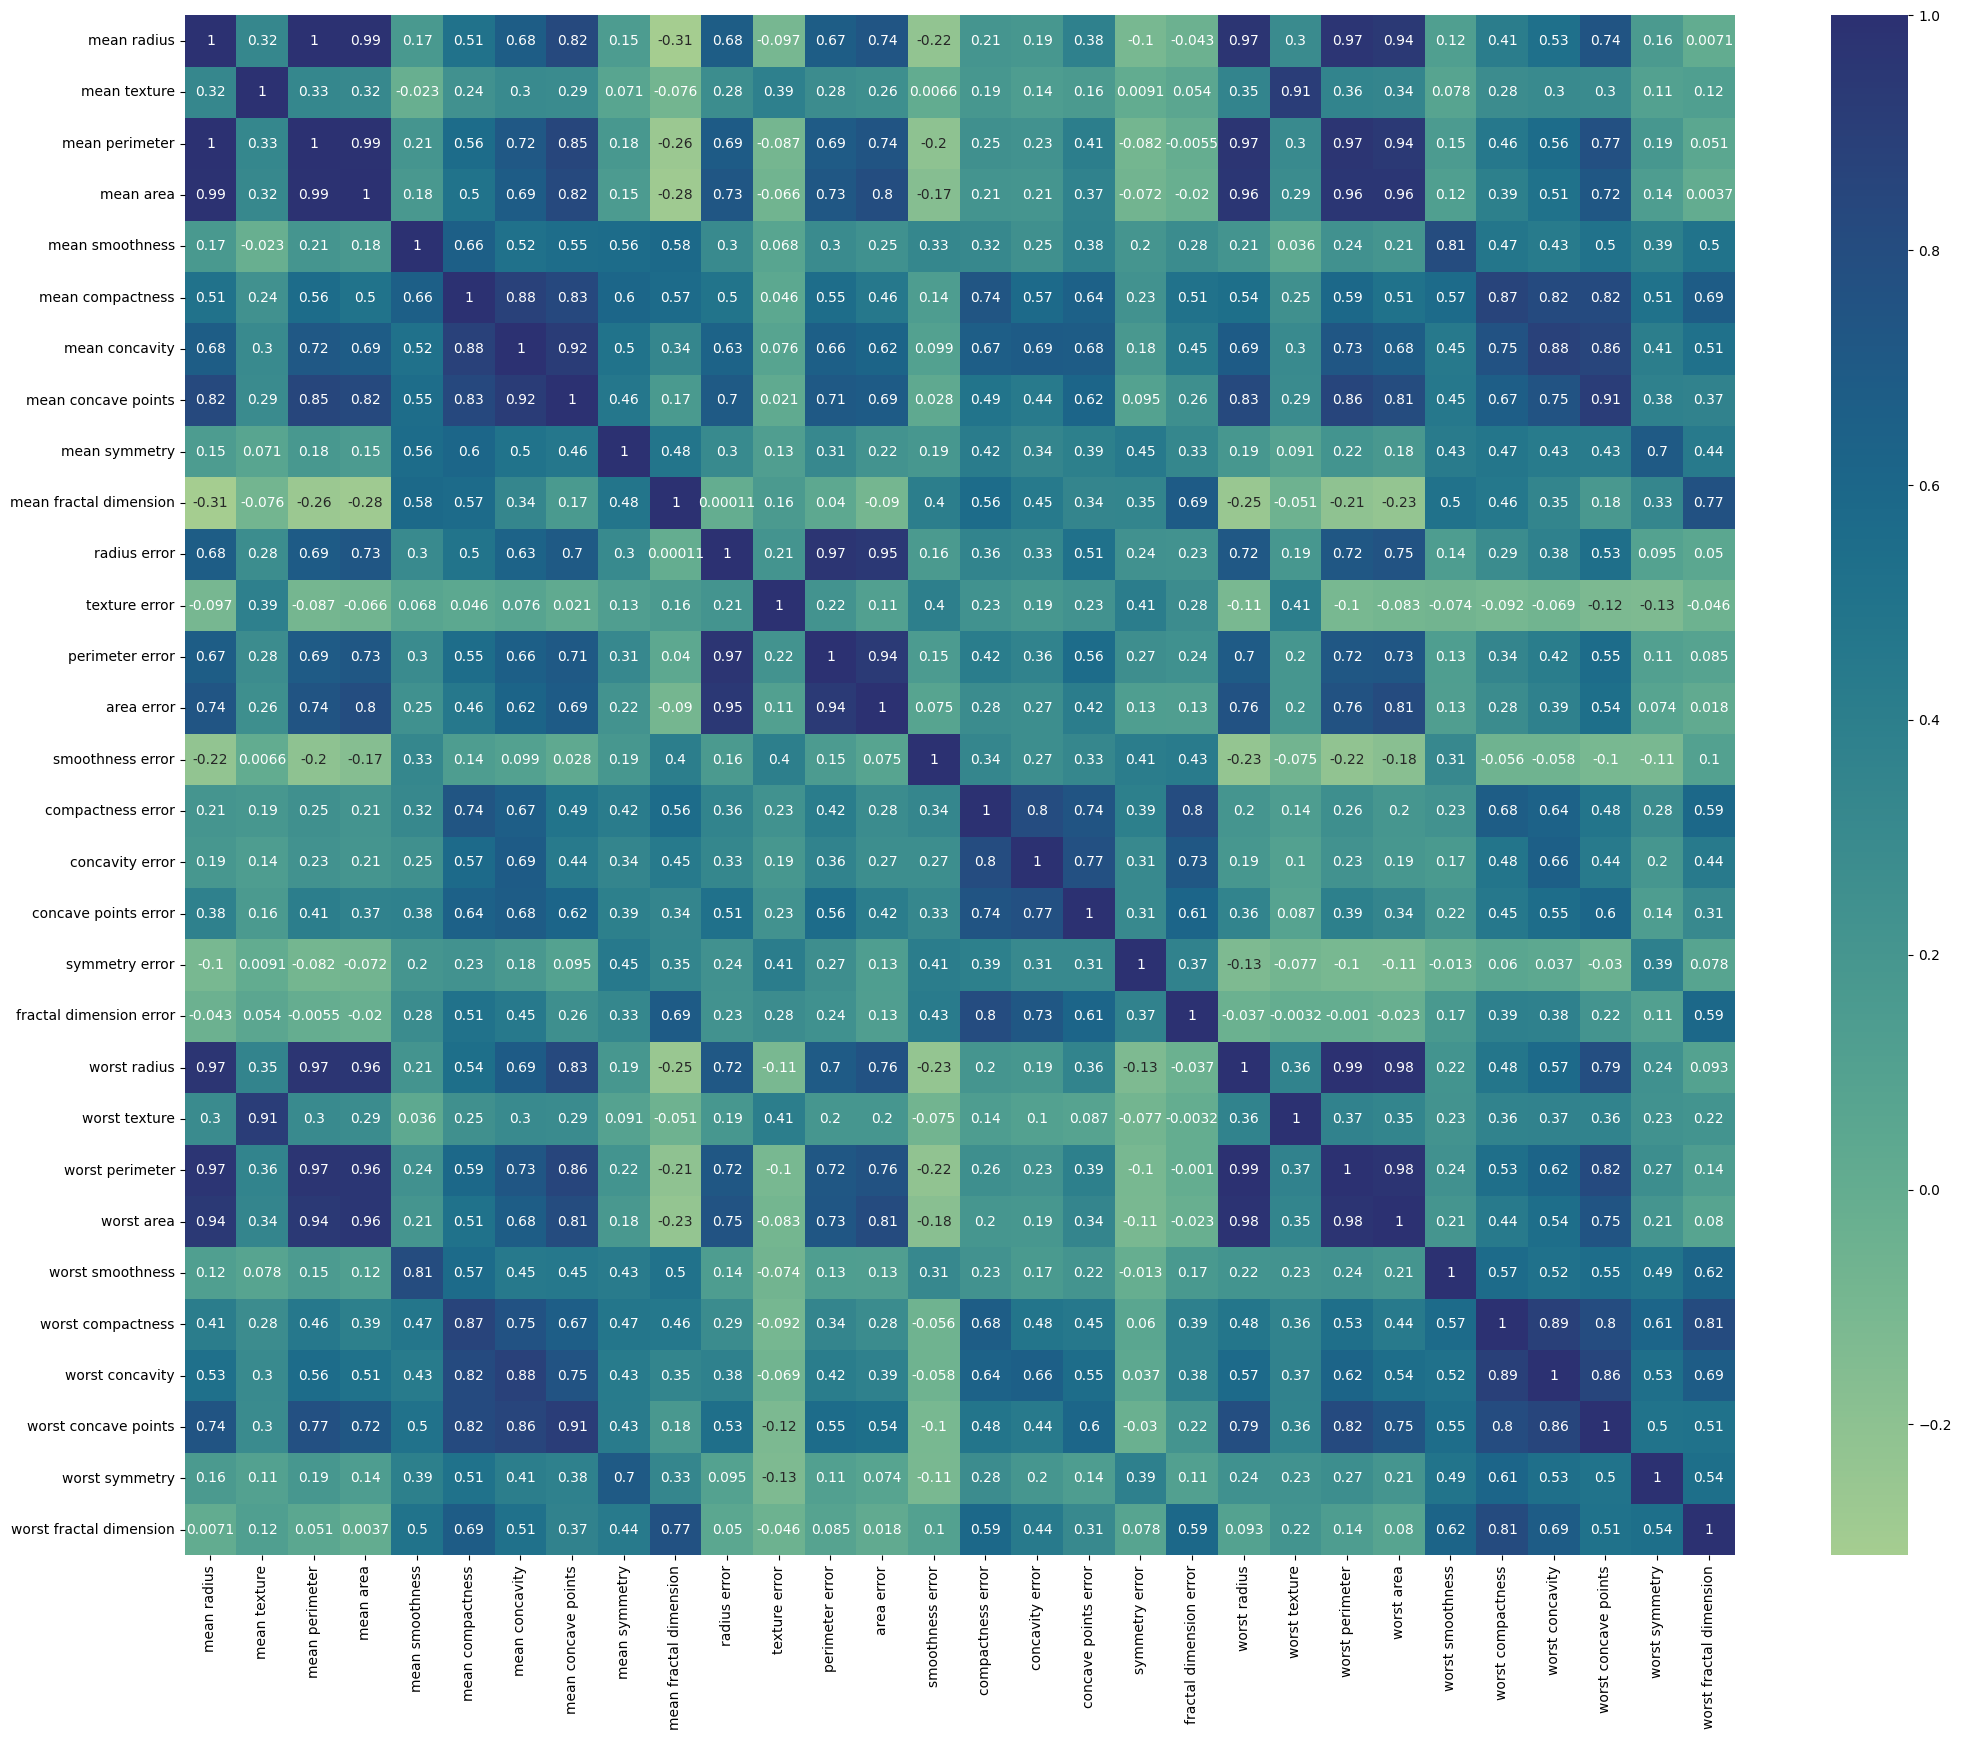

In [41]:
corr_matrix = df.drop('target', axis = 1)
corr_matrix = corr_matrix.corr()

plt.figure(figsize = (25, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'crest')
plt.show()

In [42]:
indexes = list(corr_matrix.index)

for col in corr_matrix:
  print(col)
  for row in indexes:
    if row != col:
      if corr_matrix.loc[row, col] >.9:
        print(row, corr_matrix.loc[row, col])
    # print(indexes[indexes.index(j)], corr_matrix.loc[i, j])

mean radius
mean perimeter 0.9978552814938109
mean area 0.9873571700566127
worst radius 0.9695389726112055
worst perimeter 0.9651365139559871
worst area 0.9410824595860461
mean texture
worst texture 0.912044588840421
mean perimeter
mean radius 0.9978552814938109
mean area 0.9865068039913907
worst radius 0.9694763634663146
worst perimeter 0.9703868870426394
worst area 0.9415498080023068
mean area
mean radius 0.9873571700566127
mean perimeter 0.9865068039913907
worst radius 0.9627460860470841
worst perimeter 0.9591195743552645
worst area 0.9592133256498998
mean smoothness
mean compactness
mean concavity
mean concave points 0.9213910263788588
mean concave points
mean concavity 0.9213910263788588
worst concave points 0.9101553142985918
mean symmetry
mean fractal dimension
radius error
perimeter error 0.9727936770160764
area error 0.951830112110991
texture error
perimeter error
radius error 0.9727936770160764
area error 0.9376554069544157
area error
radius error 0.951830112110991
perimeter 

**Removing multi-collinear features.**

In [43]:
new_df = df[['smoothness error', 'area error', 'texture error', 'mean fractal dimension', 'mean symmetry',
                      'mean concave points', 'mean compactness', 'mean smoothness','mean radius', 'mean texture',
                      'worst fractal dimension', 'worst symmetry', 'worst concavity', 'worst compactness',
                      'worst smoothness', 'target']]

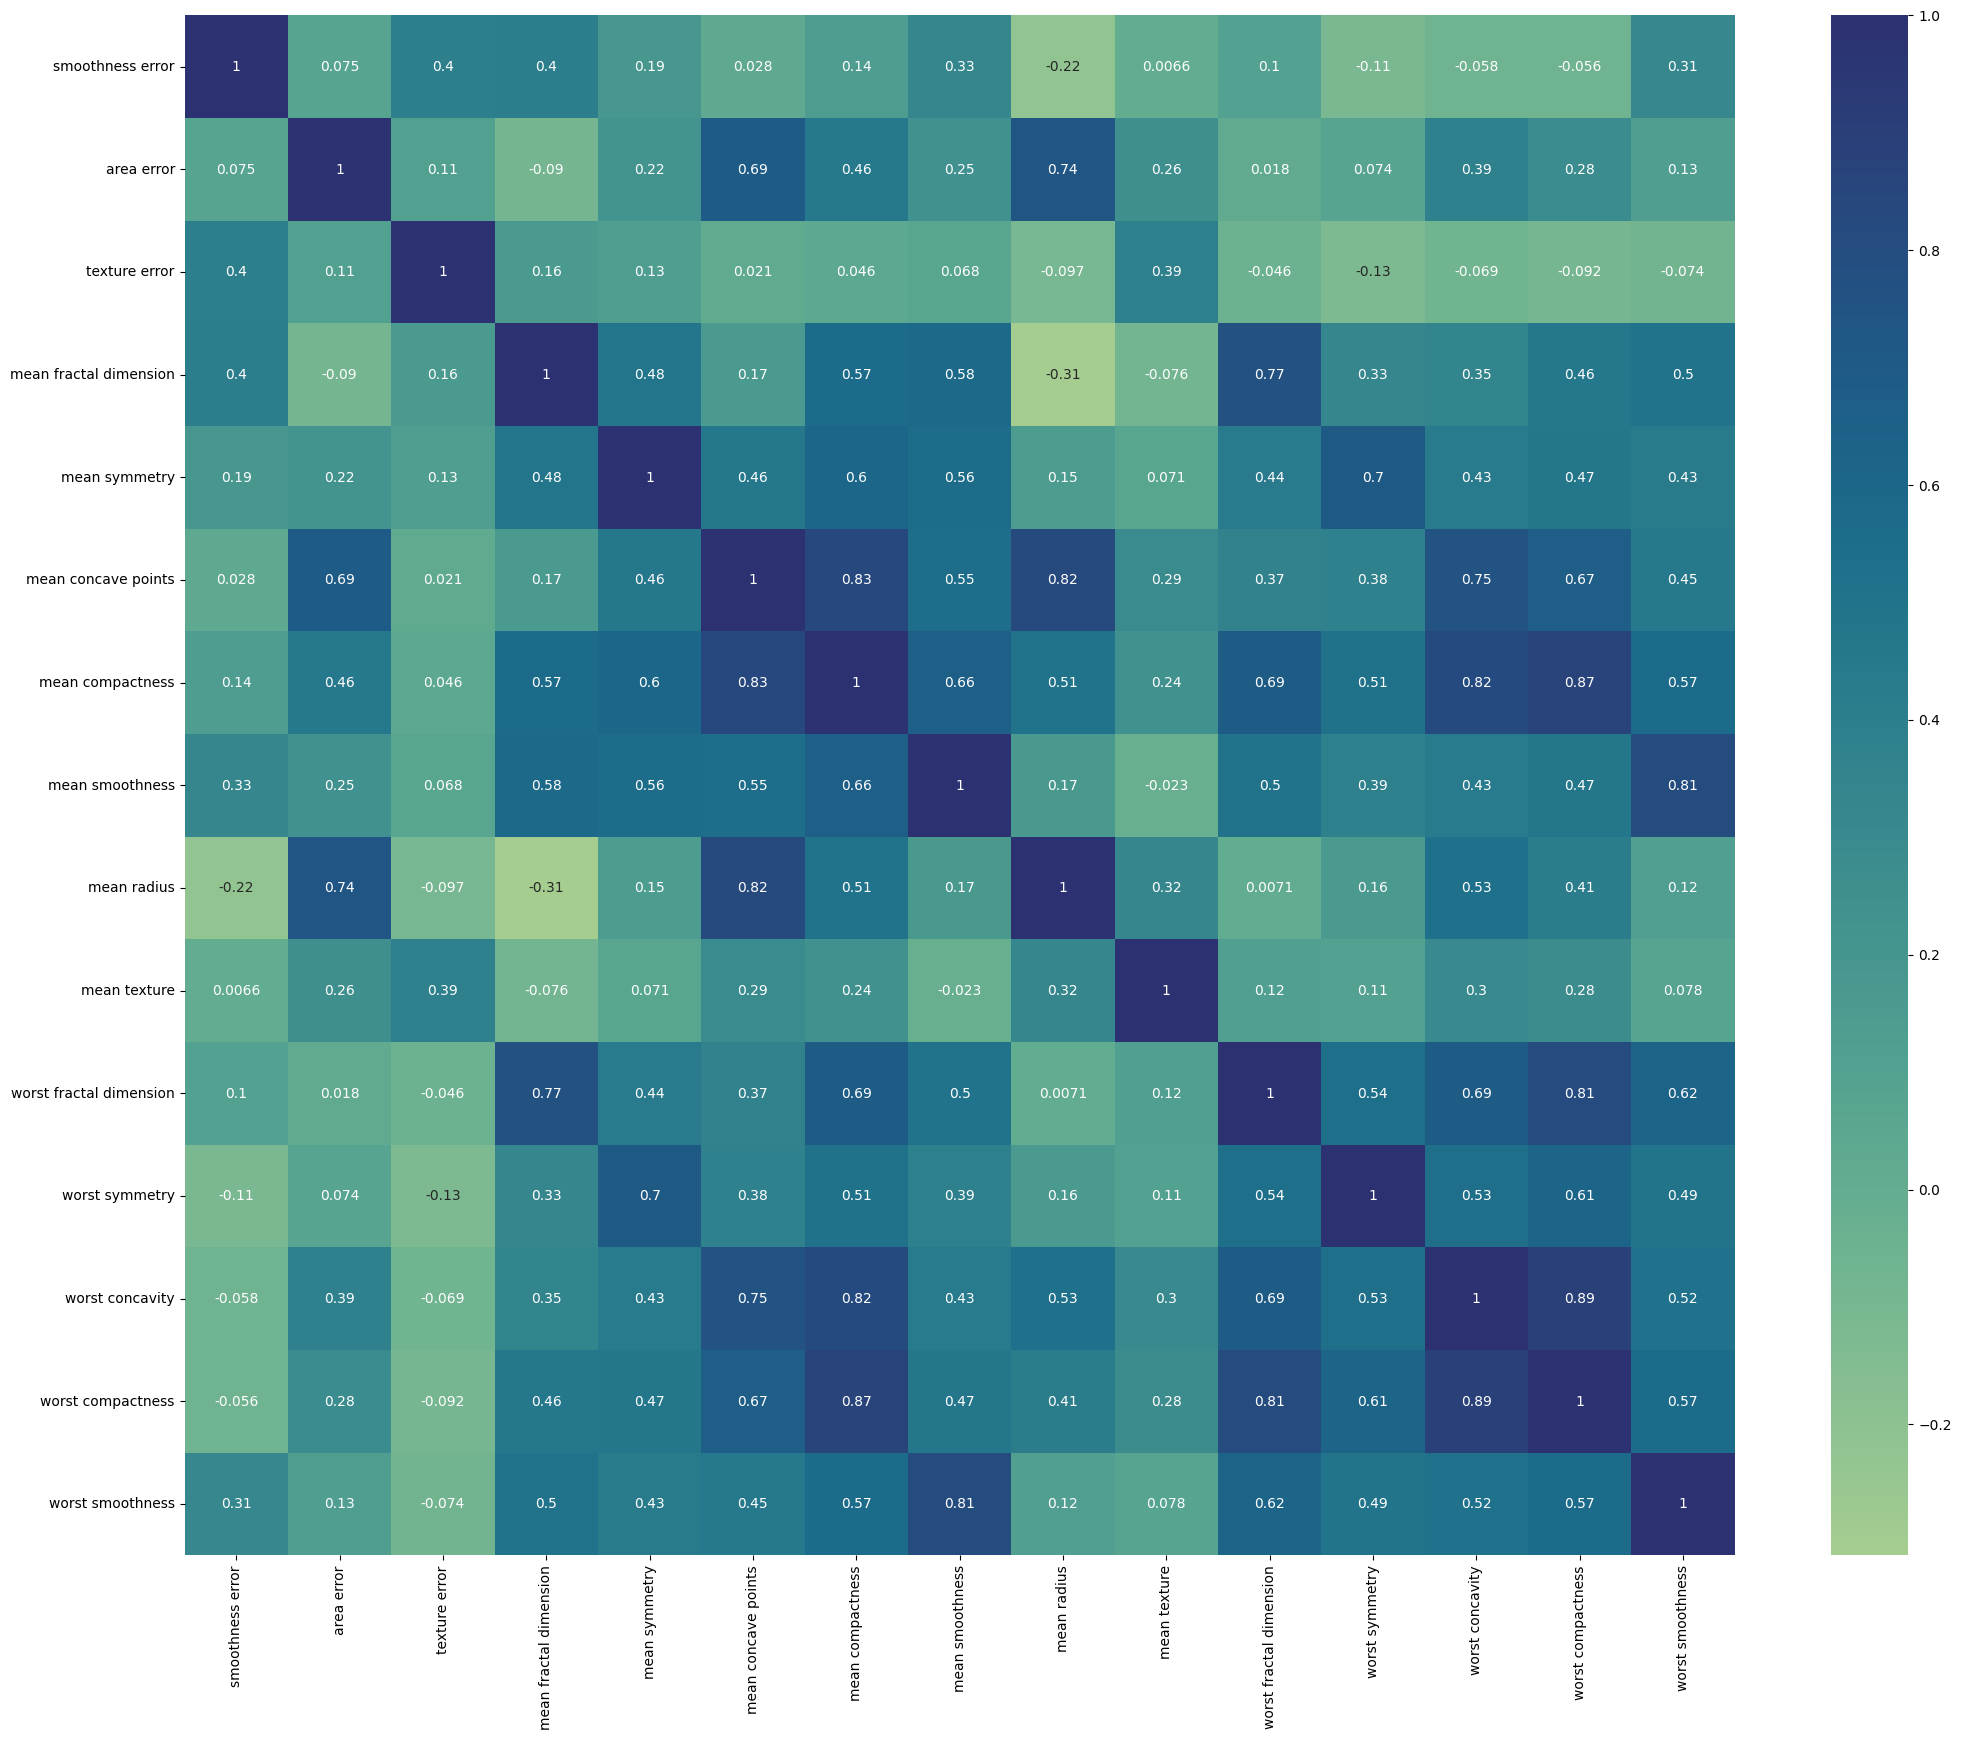

In [44]:
new_corr_matrix = new_df.drop('target', axis = 1).corr()

plt.figure(figsize = (25, 20))
sns.heatmap(new_corr_matrix, annot = True, cmap = 'crest')
plt.show()

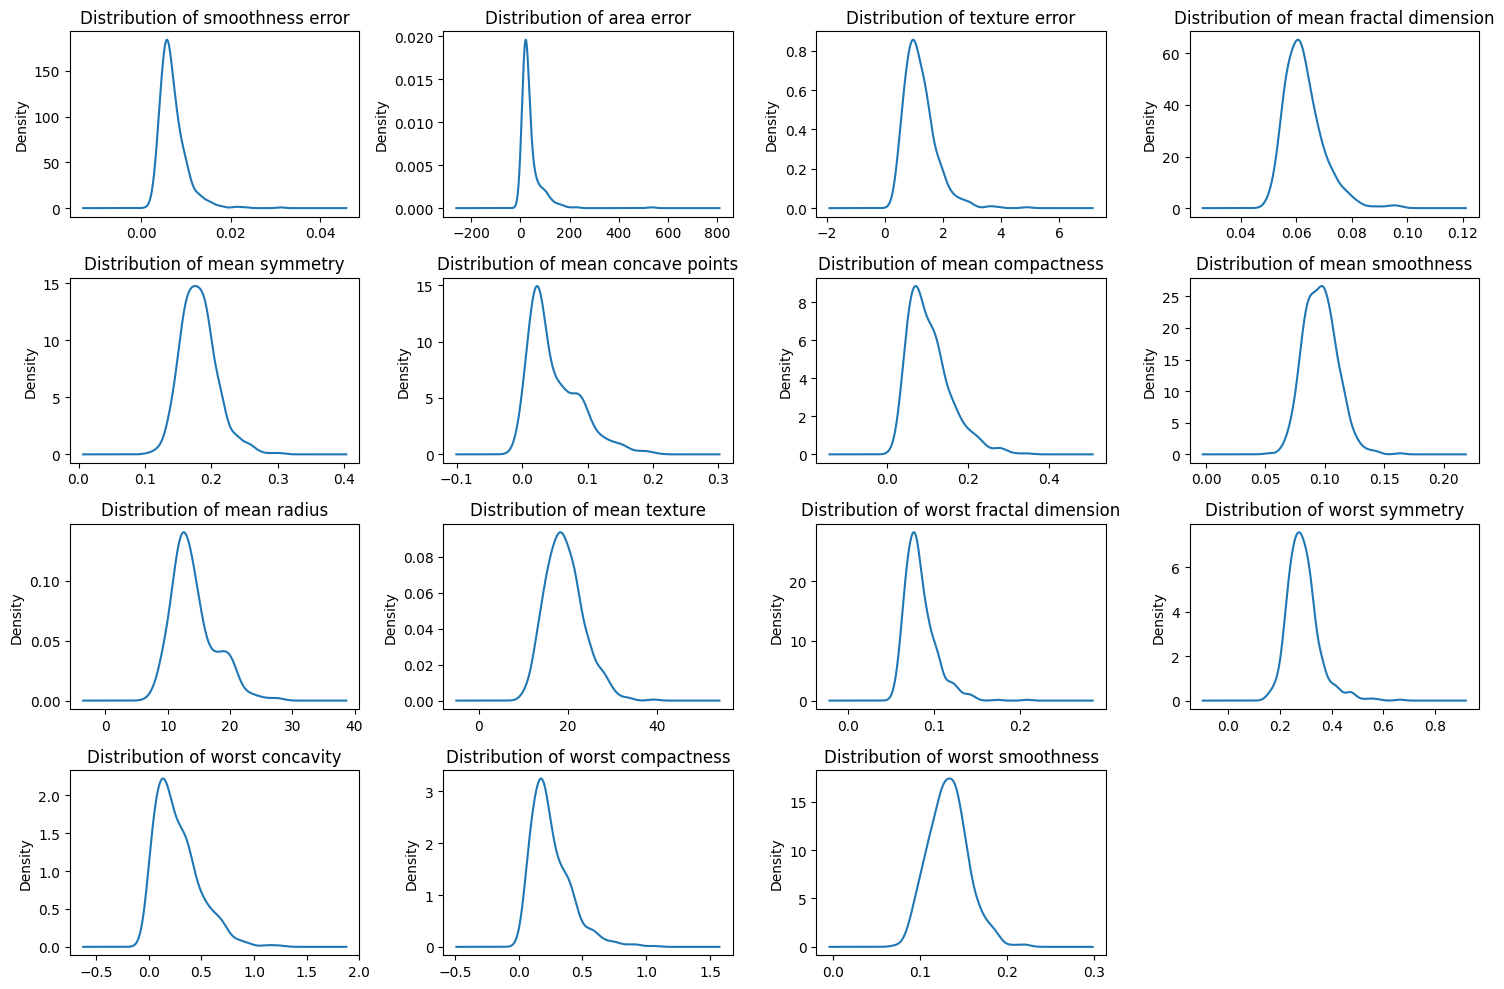

In [45]:
numeric_columns = list(new_df.drop('target', axis = 1).columns)

plt.figure(figsize = (15, 10))
for i, column in enumerate(numeric_columns, 1):
  plt.subplot(4, 4, i)
  df[numeric_columns[i-1]].plot.kde()
  plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

**Dealing with outliers**

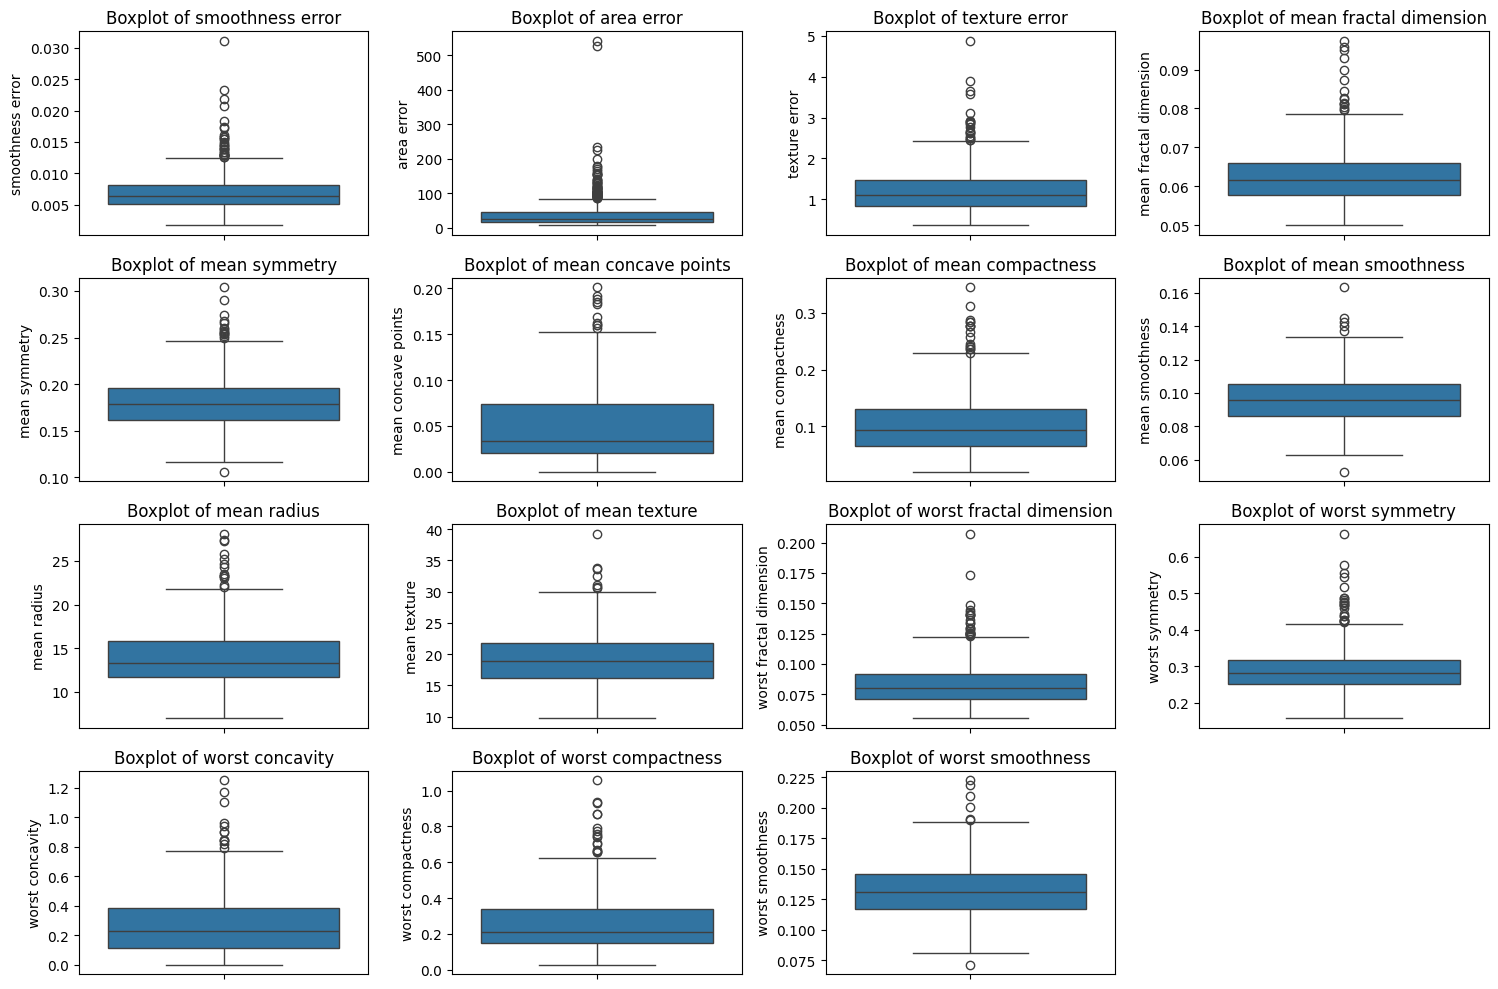

In [46]:
plt.figure(figsize = (15, 10))
for i, column in enumerate(numeric_columns, 1):
  plt.subplot(4, 4, i)
  sns.boxplot(new_df[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [47]:
new_df.columns

Index(['smoothness error', 'area error', 'texture error',
       'mean fractal dimension', 'mean symmetry', 'mean concave points',
       'mean compactness', 'mean smoothness', 'mean radius', 'mean texture',
       'worst fractal dimension', 'worst symmetry', 'worst concavity',
       'worst compactness', 'worst smoothness', 'target'],
      dtype='object')

In [48]:
new_df.head()

,smoothness error,area error,texture error,mean fractal dimension,mean symmetry,mean concave points,mean compactness,mean smoothness,mean radius,mean texture,worst fractal dimension,worst symmetry,worst concavity,worst compactness,worst smoothness,target
0,0.006399,153.40,0.9053,0.07871,0.2419,0.14710,0.27760,0.11840,17.99,10.38,0.11890,0.4601,0.7119,0.6656,0.1622,0
0,0.005225,74.08,0.7339,0.05667,0.1812,0.07017,0.07864,0.08474,20.57,17.77,0.08902,0.2750,0.2416,0.1866,0.1238,0
0,0.006150,94.03,0.7869,0.05999,0.2069,0.12790,0.15990,0.10960,19.69,21.25,0.08758,0.3613,0.4504,0.4245,0.1444,0
0,0.009110,27.23,1.1560,0.09744,0.2597,0.10520,0.28390,0.14250,11.42,20.38,0.17300,0.6638,0.6869,0.8663,0.2098,0
0,0.011490,94.44,0.7813,0.05883,0.1809,0.10430,0.13280,0.10030,20.29,14.34,0.07678,0.2364,0.4000,0.2050,0.1374,0


In [49]:
new_df['target']

,target
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0
0,0


In [50]:
for column in new_df.drop('target', axis = 1).columns:
  new_df[column + ' log'] = np.log(new_df[column] + 1)

<ipython-input-50-0782522acd69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column + ' log'] = np.log(new_df[column] + 1)
<ipython-input-50-0782522acd69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column + ' log'] = np.log(new_df[column] + 1)
<ipython-input-50-0782522acd69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [51]:
new_df.drop(['smoothness error', 'area error', 'texture error', 'mean fractal dimension', 'mean symmetry',
                      'mean concave points', 'mean compactness', 'mean smoothness','mean radius', 'mean texture',
                      'worst fractal dimension', 'worst symmetry', 'worst concavity', 'worst compactness',
                      'worst smoothness'], axis = 1, inplace = True)


**Downsampling the majority class**

In [52]:
df_majority = new_df[new_df['target'] == 1]
df_minority = new_df[new_df['target'] == 0]

In [53]:
downsampled_majority = resample(
    df_majority,
    replace = False,
    n_samples = int(len(df_minority) * 1.6),
    random_state = 55
)

balanced_df = pd.concat([downsampled_majority, df_minority])

<ipython-input-54-2e69485617e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'target', data =  balanced_df, palette = 'crest')


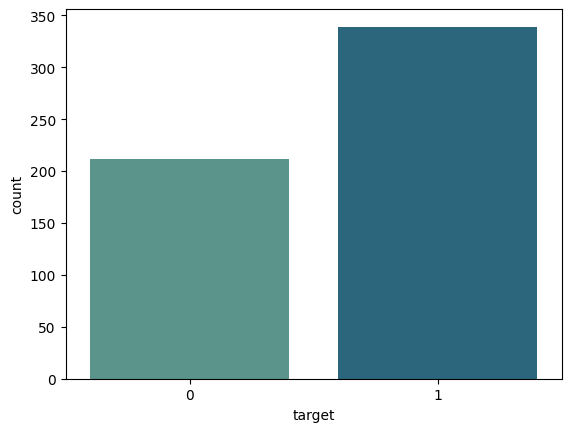

In [54]:
sns.countplot(x = 'target', data =  balanced_df, palette = 'crest')
plt.show()

#Training

In [55]:
X = balanced_df.drop('target', axis = 1)
y = balanced_df['target']

**Train-test split**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 22, stratify=y)

In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Upweighing the downsampled majority class**

In [58]:
class_weights = {0: 3.0, 1: 1.0}
sample_weights = y_train.map(class_weights)

In [59]:
rf = RandomForestClassifier(n_estimators=175, random_state = 22)

rf.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = rf.predict(X_test)

In [60]:
#Calculate accurcy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names = data.target_names))

#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9457831325301205
Classification Report:
               precision    recall  f1-score   support

   malignant       0.94      0.92      0.93        64
      benign       0.95      0.96      0.96       102

    accuracy                           0.95       166
   macro avg       0.94      0.94      0.94       166
weighted avg       0.95      0.95      0.95       166

Confusion Matrix:
 [[59  5]
 [ 4 98]]


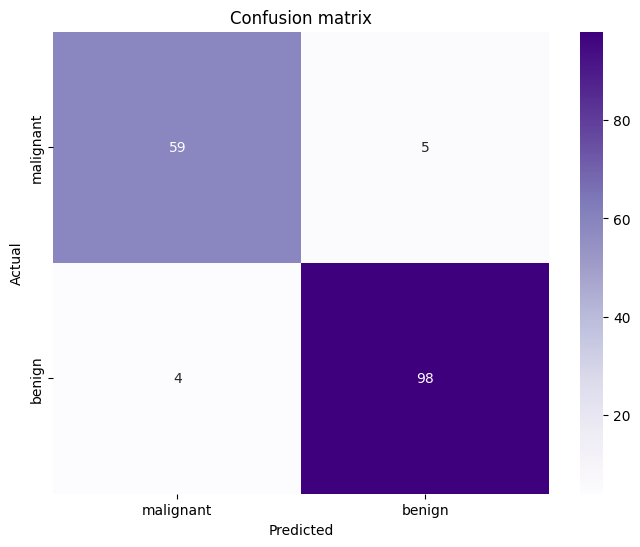

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=["malignant", "benign"], yticklabels=["malignant", "benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()